# ADA Project - Food self-sufficiency :   what about Switzerland?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

## We will first investigate the dataset we choose from the proposed list : "Global Food & Agriculture Statistics"

Based on this dataset containing informations about crops production for all countries over the world, our main idea was to link food production to hunger in some areas. One othr idea was to found the possible causes for food insufficiency (natural disasters, wars...) . 

## Load data  into a Pandas dataframe

In [2]:
complete_dataset = pd.read_csv('../data/fao_data_crops_data.csv')

In [3]:
# We split the data and metadata and store them in 'crops' and 'flags' dataframe, respecitvely.
crops = complete_dataset.loc[:2255342].copy() 
flags = complete_dataset.loc[2255344:2255348].copy() 
# 'flags' contains correspondance list of acronyms that describe how a given sample was acquired --> only informative
flags.drop(['element','year','unit','value','value_footnotes','category'], axis=1, inplace = True) 
flags.rename(columns={'country_or_area':'acronym', 'element_code':'description'}, inplace=True) 
flags.set_index('acronym', inplace=True)
flags

description
acronym                                                   
Fc                                         Calculated Data
A        May include official, semi-official or estimat...
NR                                 Not reported by country
F                                             FAO Estimate
*                                        Unofficial figure

## Exploratory data analysis

In [4]:
crops.head()

country_or_area element_code         element    year unit    value  \
0      Americas +           31  Area Harvested  2007.0   Ha  49404.0   
1      Americas +           31  Area Harvested  2006.0   Ha  49404.0   
2      Americas +           31  Area Harvested  2005.0   Ha  49404.0   
3      Americas +           31  Area Harvested  2004.0   Ha  49113.0   
4      Americas +           31  Area Harvested  2003.0   Ha  48559.0   

  value_footnotes          category  
0              A   agave_fibres_nes  
1              A   agave_fibres_nes  
2              A   agave_fibres_nes  
3              A   agave_fibres_nes  
4              A   agave_fibres_nes

In [5]:
print("Size of the DataFrame: {s}\n".format(s=crops.shape))
print("Variable types present in DataFrame: \n{t}".format(t=crops.dtypes))

Size of the DataFrame: (2255343, 8)

Variable types present in DataFrame: 
country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object


In [6]:
# List all the different footnotes values present in the dataset
footnotes = crops['value_footnotes'].unique() 
print(footnotes)
# Display dataframe that only contains one given value of 'value_footnotes'
display(crops.query('value_footnotes==@footnotes[4]')) 
# Return dataframe that only contains samples having NaN as value for 'value_footnotes'
crops[crops.value_footnotes.isnull()] 

['A ' 'F ' nan 'Fc' 'NR']


country_or_area element_code              element    year    unit  \
1389             Mexico           31       Area Harvested  1981.0      Ha   
1390             Mexico           31       Area Harvested  1980.0      Ha   
1391             Mexico           31       Area Harvested  1979.0      Ha   
1392             Mexico           31       Area Harvested  1978.0      Ha   
1393             Mexico           31       Area Harvested  1977.0      Ha   
...                 ...          ...                  ...     ...     ...   
2254398     Puerto Rico           51  Production Quantity  1965.0  tonnes   
2254399     Puerto Rico           51  Production Quantity  1964.0  tonnes   
2254400     Puerto Rico           51  Production Quantity  1963.0  tonnes   
2254401     Puerto Rico           51  Production Quantity  1962.0  tonnes   
2254402     Puerto Rico           51  Production Quantity  1961.0  tonnes   

         value value_footnotes          category  
1389       0.0              NR  agave_fibres_nes  
1390       0.0              NR  agave_fibres_nes  
1391       0.0              NR  agave_fibres_nes  
1392       0.0              NR  agave_fibres_nes  
1393       0.0              NR  agave_fibres_nes  
...        ...             ...               ...  
2254398    0.0              NR    yautia_cocoyam  
2254399    0.0              NR    yautia_cocoyam  
2254400    0.0              NR    yautia_cocoyam  
2254401    0.0              NR    yautia_cocoyam  
2254402    0.0              NR    yautia_cocoyam  

[150249 rows x 8 columns]

country_or_area element_code              element  \
567                               Colombia           31       Area Harvested   
568                               Colombia           31       Area Harvested   
569                               Colombia           31       Area Harvested   
570                               Colombia           31       Area Harvested   
571                               Colombia           31       Area Harvested   
...                                    ...          ...                  ...   
2255150  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255151  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255152  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255153  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255154  Venezuela, Bolivarian Republic of           51  Production Quantity   

           year    unit    value value_footnotes          category  
567      2004.0      Ha  17294.0             NaN  agave_fibres_nes  
568      2003.0      Ha  17094.0             NaN  agave_fibres_nes  
569      2002.0      Ha  17391.0             NaN  agave_fibres_nes  
570      2001.0      Ha  16802.0             NaN  agave_fibres_nes  
571      2000.0      Ha  17987.0             NaN  agave_fibres_nes  
...         ...     ...      ...             ...               ...  
2255150  1965.0  tonnes  61062.0             NaN    yautia_cocoyam  
2255151  1964.0  tonnes  59225.0             NaN    yautia_cocoyam  
2255152  1963.0  tonnes  57500.0             NaN    yautia_cocoyam  
2255153  1962.0  tonnes  55825.0             NaN    yautia_cocoyam  
2255154  1961.0  tonnes  54199.0             NaN    yautia_cocoyam  

[479376 rows x 8 columns]

In [7]:
print(crops['element'].unique())
print(crops['year'].unique())
print(crops['unit'].unique())
print(crops['category'].unique())
print(crops['element_code'].unique())
print(crops['country_or_area'].unique())

['Area Harvested' 'Yield' 'Production Quantity' nan 'Seed'
 'Gross Production 1999-2001 (1000 I$)'
 'Net Production 1999-2001 (1000 I$)' 'Gross PIN (base 1999-2001)'
 'Grs per capita PIN (base 1999-2001)' 'Net PIN (base 1999-2001)'
 'Net per capita PIN (base 1999-2001)']
[2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961.   nan]
['Ha' 'Hg/Ha' 'tonnes' nan '1000 Int. $' 'Int. $']
['agave_fibres_nes' 'almonds_with_shell' 'anise_badian_fennel_corian'
 'apples' 'apricots' 'arecanuts' 'artichokes' 'asparagus' 'avocados'
 'bambara_beans' 'bananas' 'barley' 'beans_dry' 'beans_green'
 'berries_nes' 'blueberries' 'brazil_nuts_with_shell'
 'broad_beans_horse_beans_dry' 'buckwheat' 'cabbages_and_other_brassicas'
 'canary_seed' 'carobs' 'carrots_and_turnips' 'cashew_n

## Data preprocessing

We clear the data by dropping all the row containing only NAN values. 
We also clear the raw where value_footnotes is NR as it means not repported by country, so it won't be usefull for our analysis. 

In [8]:
# Returns a boolean of whether a column contains NaN (True) or not (False).
print(crops.isnull().values.any(axis=0)) 

# Drop rows which contain only missing values.
crops.dropna(how='all', inplace=True) 

[False False  True  True  True  True  True False]


In [9]:
# We drop the samples where 'value' is unknown (NaN) because they are of no utility    
crops.dropna(subset=['value', 'value_footnotes'], inplace=True) 

# Let's drop also all the samples that have 'NR' as a 'value_footnotes' value or 0 as 'value'
crops.drop(index=crops[crops['value_footnotes'].str.contains('NR')].index, inplace=True)
crops.drop(index=crops[crops['value']==0].index, inplace=True)


In our dataset, regions are indicated by a "+" at the end of their names. We want to separate regions from countries to facilitate our analysis so we can be more precise. 

In [10]:
regions_bool = crops['country_or_area'].str.contains('\+')
crops_regions = crops[regions_bool].copy()
crops_countries = crops[~regions_bool].copy()
crops_countries[crops_countries.country_or_area.str.contains('China')].tail()

country_or_area element_code element    year   unit    value  \
2218503  China, mainland           41   Yield  1965.0  Hg/Ha  10216.0   
2218504  China, mainland           41   Yield  1964.0  Hg/Ha   8210.0   
2218505  China, mainland           41   Yield  1963.0  Hg/Ha   7779.0   
2218506  China, mainland           41   Yield  1962.0  Hg/Ha   6929.0   
2218507  China, mainland           41   Yield  1961.0  Hg/Ha   5578.0   

        value_footnotes category  
2218503              Fc    wheat  
2218504              Fc    wheat  
2218505              Fc    wheat  
2218506              Fc    wheat  
2218507              Fc    wheat

We calculate the mean of all the elements for every country so we can compare the area harvested, seed or yield between each country. The mean is calculated over all years. 

In [28]:
#calculate the mean of all the elements for every country.  
crops_countries_by_country_year = crops_countries.groupby(['country_or_area', 'element']) \
                            .agg({'value':'mean'}) \
                            .rename(columns={'value':'mean_element'}) 
crops_countries_by_country_year

mean_element
country_or_area element                                            
Afghanistan     Area Harvested                        242601.956925
                Gross PIN (base 1999-2001)               144.595745
                Gross Production 1999-2001 (1000 I$)  552737.382979
                Grs per capita PIN (base 1999-2001)      210.723404
                Net PIN (base 1999-2001)                 146.744681
...                                                             ...
Zimbabwe        Net Production 1999-2001 (1000 I$)    231112.829787
                Net per capita PIN (base 1999-2001)      144.297872
                Production Quantity                   157003.056911
                Seed                                   11393.516165
                Yield                                  52685.685310

[1955 rows x 1 columns]

In [29]:
area_harvested = crops_countries_by_country_year.loc[(slice(None),'Area Harvested'), :]
area_harvested.loc['United States of America']

mean_element
element                     
Area Harvested  1.157010e+07

#### Create a map showing yield by country (average over all years) 

The following maps provide an insight of agricultural yield and area harvested in World countries.


In [31]:
yield_df= crops_countries_by_country_year.loc[(slice(None),'Yield'), :]
#we take the log value for the following plot, so our quantile a more equilibrate
log_yield_df=pd.DataFrame(yield_df.mean_element.map(lambda x:np.log(x)))
log_yield_df.head()

mean_element
country_or_area element              
Afghanistan     Yield       10.787559
Albania         Yield       11.004285
Algeria         Yield       10.720772
American Samoa  Yield       10.409717
Angola          Yield       10.522206

In [33]:
m = folium.Map(location=[48, -102], zoom_start=3)

world_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
Bins = list(yield_df.mean_element.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=log_yield_df,
    columns=[log_yield_df.index.get_level_values(level='country_or_area').values,'mean_element'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='yield',
    #bins = Bins,
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

The countries having the most important yield are Iceland and Danemark. We can also see that in many countries of Africa the yield is very low. Mongolia has also a very low yield. We can see the yield of Switzerland is higher than its neighbours (averaged over years).

#### Area Hervested (mean)/superficy(mean over years) by country
 
Such a way to calculate the ratio is hard to interpret. What we should do instead is to calculate an average for each year and make an interactive plot so we can select the year we want to analyze and show the map. 

In [16]:
surface_country = pd.read_csv('../data/API_AG.LND.TOTL.K2_DS2_en_csv_v2_422954.csv', skiprows=3)
surface_country.set_index('Country Name', inplace = True)

In [17]:
surface_country.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

In [18]:
surface_country

1960       1961       1962       1963       1964       1965  \
Country Name                                                                
Aruba          NaN      180.0      180.0      180.0      180.0      180.0   
Afghanistan    NaN   652860.0   652860.0   652860.0   652860.0   652860.0   
Angola         NaN  1246700.0  1246700.0  1246700.0  1246700.0  1246700.0   
Albania        NaN    27400.0    27400.0    27400.0    27400.0    27400.0   
Andorra        NaN      470.0      470.0      470.0      470.0      470.0   
...            ...        ...        ...        ...        ...        ...   
Kosovo         NaN    10887.0    10887.0    10887.0    10887.0    10887.0   
Yemen, Rep.    NaN   527970.0   527970.0   527970.0   527970.0   527970.0   
South Africa   NaN  1213090.0  1213090.0  1213090.0  1213090.0  1213090.0   
Zambia         NaN   743390.0   743390.0   743390.0   743390.0   743390.0   
Zimbabwe       NaN   386850.0   386850.0   386850.0   386850.0   386850.0   

                   1966       1967       1968       1969  ...       2011  \
Country Name                                              ...              
Aruba             180.0      180.0      180.0      180.0  ...      180.0   
Afghanistan    652860.0   652860.0   652860.0   652860.0  ...   652860.0   
Angola        1246700.0  1246700.0  1246700.0  1246700.0  ...  1246700.0   
Albania         27400.0    27400.0    27400.0    27400.0  ...    27400.0   
Andorra           470.0      470.0      470.0      470.0  ...      470.0   
...                 ...        ...        ...        ...  ...        ...   
Kosovo          10887.0    10887.0    10887.0    10887.0  ...    10887.0   
Yemen, Rep.    527970.0   527970.0   527970.0   527970.0  ...   527970.0   
South Africa  1213090.0  1213090.0  1213090.0  1213090.0  ...  1213090.0   
Zambia         743390.0   743390.0   743390.0   743390.0  ...   743390.0   
Zimbabwe       386850.0   386850.0   386850.0   386850.0  ...   386850.0   

                   2012       2013       2014       2015       2016  \
Country Name                                                          
Aruba             180.0      180.0      180.0      180.0      180.0   
Afghanistan    652860.0   652860.0   652860.0   652860.0   652860.0   
Angola        1246700.0  1246700.0  1246700.0  1246700.0  1246700.0   
Albania         27400.0    27400.0    27400.0    27400.0    27400.0   
Andorra           470.0      470.0      470.0      470.0      470.0   
...                 ...        ...        ...        ...        ...   
Kosovo          10887.0    10887.0    10887.0    10887.0    10887.0   
Yemen, Rep.    527970.0   527970.0   527970.0   527970.0   527970.0   
South Africa  1213090.0  1213090.0  1213090.0  1213090.0  1213090.0   
Zambia         743390.0   743390.0   743390.0   743390.0   743390.0   
Zimbabwe       386850.0   386850.0   386850.0   386850.0   386850.0   

                   2017       2018  2019  Unnamed: 64  
Country Name                                           
Aruba             180.0      180.0   NaN          NaN  
Afghanistan    652860.0   652860.0   NaN          NaN  
Angola        1246700.0  1246700.0   NaN          NaN  
Albania         27400.0    27400.0   NaN          NaN  
Andorra           470.0      470.0   NaN          NaN  
...                 ...        ...   ...          ...  
Kosovo          10887.0        NaN   NaN          NaN  
Yemen, Rep.    527970.0   527970.0   NaN          NaN  
South Africa  1213090.0  1213090.0   NaN          NaN  
Zambia         743390.0   743390.0   NaN          NaN  
Zimbabwe       386850.0   386850.0   NaN          NaN  

[264 rows x 61 columns]

In [19]:
mean_ = surface_country.apply('mean', axis=1)
df_surface_country = pd.DataFrame(mean_,columns=['mean_superficy'], index=surface_country.index)#.rename(columns={'0':'mean'})

In [20]:
df_surface_country

mean_superficy
Country Name                
Aruba                  180.0
Afghanistan         652860.0
Angola             1246700.0
Albania              27400.0
Andorra                470.0
...                      ...
Kosovo               10887.0
Yemen, Rep.         527970.0
South Africa       1213090.0
Zambia              743390.0
Zimbabwe            386850.0

[264 rows x 1 columns]

In [21]:
crops_countries_area = area_harvested.join(df_surface_country['mean_superficy'], on='country_or_area', how='left')
crops_countries_area['ratio'] = area_harvested['mean_area_harvested']/(crops_countries_area['mean_superficy']*100) 
crops_countries_area.dropna(inplace=True)

In [22]:
crops_countries_area.head()

mean_area_harvested  mean_superficy     ratio
country_or_area element                                                      
Afghanistan     Area Harvested        242601.956925        652860.0  0.003716
Albania         Area Harvested         42248.004417         27400.0  0.015419
Algeria         Area Harvested        293350.081841       2381740.0  0.001232
American Samoa  Area Harvested           690.087819           200.0  0.034504
Angola          Area Harvested        129773.309719       1246700.0  0.001041

#### Create a map showing this ratio by country

In [23]:
crops_countries_area_df=pd.DataFrame(crops_countries_area.ratio)
crops_countries_area_df.head()
log_df=pd.DataFrame(crops_countries_area_df.ratio.map(lambda x:np.log(x)))
type(log_df)

pandas.core.frame.DataFrame

In [24]:
m = folium.Map(location=[48, -102], zoom_start=3)

world_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
Bins = list(crops_countries_area.ratio.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=log_df,
    columns=[crops_countries_area.index.get_level_values(level='country_or_area').values,'ratio'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='country surface vs surface harvested ratio',
    #bins = Bins,
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

On the map above, we see Switzerland has not a high ratio of area harvested over its total superficy compared to its neighbours (averaged over years). Hence, in further analysis, we will investigate whether augmenting this ratio could be feasible in the future.

In [25]:
crops_countries_by_country_by_category = crops_countries.groupby(['country_or_area','element', 'category'])
crops_countries_by_country_by_category = pd.DataFrame(data=crops_countries_by_country_by_category.value.sum().reset_index(name='total').sort_values(by='total',ascending=False))

crops_countries_by_country_by_category.head(10)

country_or_area              element                 category  \
5890                      China  Production Quantity            cereals_total   
6154            China, mainland  Production Quantity            cereals_total   
32139  United States of America  Production Quantity            cereals_total   
32138  United States of America  Production Quantity  cereals_rice_milled_eqv   
5889                      China  Production Quantity  cereals_rice_milled_eqv   
6153            China, mainland  Production Quantity  cereals_rice_milled_eqv   
32143  United States of America  Production Quantity       coarse_grain_total   
14089                     India  Production Quantity            cereals_total   
5974                      China  Production Quantity  vegetables_melons_total   
6238            China, mainland  Production Quantity  vegetables_melons_total   

              total  
5890   1.471658e+10  
6154   1.458751e+10  
32139  1.300548e+10  
32138  1.290510e+10  
5889   1.235944e+10  
6153   1.226976e+10  
32143  1.015979e+10  
14089  7.686458e+09  
5974   7.017600e+09  
6238   6.897959e+09

we can see that China and the united states are the main producers of cereals_total and cereale_rice_milled_eq. 

  
 ## What are the principal foodstuffs produced in each country/region of the world? And which countries are the biggest producers for a given food?

In [20]:
main_product=crops_countries_by_country_by_category.drop_duplicates(subset='country_or_area', keep='first')
main_product.head(10)

country_or_area              element                 category  \
5890                      China  Production Quantity            cereals_total   
6154            China, mainland  Production Quantity            cereals_total   
32139  United States of America  Production Quantity            cereals_total   
14089                     India  Production Quantity            cereals_total   
31339                      USSR  Production Quantity            cereals_total   
10944                    France  Production Quantity            cereals_total   
4980                     Canada  Production Quantity  cereals_rice_milled_eqv   
14343                 Indonesia  Production Quantity            cereals_total   
3737                     Brazil  Production Quantity            cereals_total   
22418                   Nigeria  Production Quantity   roots_and_tubers_total   

              total  
5890   1.471658e+10  
6154   1.458751e+10  
32139  1.300548e+10  
14089  7.686458e+09  
31339  4.958993e+09  
10944  2.266594e+09  
4980   2.027433e+09  
14343  1.906435e+09  
3737   1.686881e+09  
22418  1.665520e+09

We decide to keep only the Production quantity for further analysis.

In [21]:
ind_keep=pd.Series(main_product.element.str.contains('Production Quantity'))
ind_keep=ind_keep[ind_keep].index

main_product_quantity = main_product.drop(index=main_product.index.difference(ind_keep))
main_product_quantity.head(10)

country_or_area              element                 category  \
5890                      China  Production Quantity            cereals_total   
6154            China, mainland  Production Quantity            cereals_total   
32139  United States of America  Production Quantity            cereals_total   
14089                     India  Production Quantity            cereals_total   
31339                      USSR  Production Quantity            cereals_total   
10944                    France  Production Quantity            cereals_total   
4980                     Canada  Production Quantity  cereals_rice_milled_eqv   
14343                 Indonesia  Production Quantity            cereals_total   
3737                     Brazil  Production Quantity            cereals_total   
22418                   Nigeria  Production Quantity   roots_and_tubers_total   

              total  
5890   1.471658e+10  
6154   1.458751e+10  
32139  1.300548e+10  
14089  7.686458e+09  
31339  4.958993e+09  
10944  2.266594e+09  
4980   2.027433e+09  
14343  1.906435e+09  
3737   1.686881e+09  
22418  1.665520e+09

In [22]:
main_product_quantity.category.unique()

array(['cereals_total', 'cereals_rice_milled_eqv',
       'roots_and_tubers_total', 'oil_palm_fruit', 'sugar_cane',
       'fruit_excl_melons_total', 'vegetables_melons_total', 'coconuts',
       'fibre_crops_primary', 'grapes'], dtype=object)

In the previous dataframe (main_product_quantity) we show the category that is most produced by each country in term of production quantity. 

We can see that China and the United States are the main producers of cereals, Canada is the main producer of cereals_rice_milled. Nigeria and Poland are the mais producers of roots and tubbers. Philippines mainly produces sugar cane and Malesia mainly produces oil_palm_fruit. 

## Are all countries equal in terms of diversity of foodstuffs harvested?
    
To answer this question, we simply count the number of categories produced by countries, so we can get an idea of their food production diversity.

In [36]:
food_diversity = pd.DataFrame(crops_countries.groupby(['country_or_area','category'])['category'].count().reset_index(name='total'))
food_diversity.head(10)

country_or_area                    category  total
0     Afghanistan          almonds_with_shell     69
1     Afghanistan  anise_badian_fennel_corian     66
2     Afghanistan                      apples    139
3     Afghanistan                    apricots    136
4     Afghanistan                      barley     98
5     Afghanistan                 berries_nes    139
6     Afghanistan     cereals_rice_milled_eqv    188
7     Afghanistan               cereals_total    470
8     Afghanistan            citrus_fruit_nes    136
9     Afghanistan          citrus_fruit_total    141

In [37]:
food_diversity = pd.DataFrame(food_diversity.groupby(['country_or_area']).country_or_area.size().reset_index(name='category_diversity'))

In [38]:
food_diversity.sort_values('category_diversity', ascending=False).head(10)

country_or_area  category_diversity
40             China, mainland                 127
124                     Mexico                 120
39                       China                 117
180                      Spain                 114
198                     Turkey                 110
130                    Morocco                 108
151                       Peru                 105
207   United States of America                 105
94                       Italy                 103
90   Iran, Islamic Republic of                 100

In [42]:
sorted_diversity = food_diversity.sort_values('category_diversity', ascending=False).reset_index()
sorted_diversity.loc[sorted_diversity.country_or_area=='Switzerland']

index country_or_area  category_diversity
72    186     Switzerland                  66

In [51]:
sorted_diversity.category_diversity.describe()

count    219.000000
mean      54.210046
std       26.718919
min        1.000000
25%       35.000000
50%       52.000000
75%       75.000000
max      127.000000
Name: category_diversity, dtype: float64

(array([ 8.,  4.,  3.,  8., 12.,  7., 20., 17., 13., 14., 21., 10., 10.,
         7., 17.,  8., 15.,  6.,  7.,  3.,  3.,  2.,  1.,  2.,  1.]),
 array([  1.  ,   6.04,  11.08,  16.12,  21.16,  26.2 ,  31.24,  36.28,
         41.32,  46.36,  51.4 ,  56.44,  61.48,  66.52,  71.56,  76.6 ,
         81.64,  86.68,  91.72,  96.76, 101.8 , 106.84, 111.88, 116.92,
        121.96, 127.  ]),
 <a list of 25 Patch objects>)

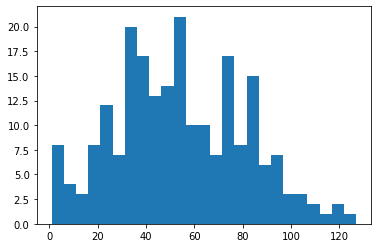

In [49]:
plt.hist(sorted_diversity.category_diversity, bins=25)

We see that Switzerland is above the median of the food production diversity of all countries with 66 agricultural products produced. It is a fair value but still far from the top countries like its neighbour Italy. So there could some improvements to do on the production diversity of Switzerland, which will be discussed later in the analysis.

### Interactive visualization of element of a given category by a given country throughout years

In [54]:
#TO RUN THIS: with conda --> conda install -c conda-forge ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#To enable interactive viz on lab --> conda install nodejs
#                                  + jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [55]:
#Interactive visualization
def viz_evolution(country, element, category):
    df_to_plot = crops_countries.loc[crops_countries['country_or_area'] == country].loc[crops_countries['element'] == element].loc[crops_countries['category'] == category]
    df_to_plot.plot(x='year', y='value',figsize=(20,10))
    plt.title(f'{element} values of {category} in {country} throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()

countries = crops_countries.country_or_area.unique()    
elements = crops_countries.element.unique()
categories = crops_countries.category.unique()
interact(viz_evolution, country=countries, element = elements , category=categories)    

interactive(children=(Dropdown(description='country', options=('Colombia', 'Cuba', 'Ecuador', 'El Salvador', '…

<function __main__.viz_evolution(country, element, category)>

Now that we have well understood our dataset we can redefine our project goals. 
As we have many data for almost all the countries in the world we had to redefine the direction we wanted to follow. So we decided to focus our attention on one country only: Switzerland!
We will try to answer the following question: Can Switzerland be self-sufficient in term of food production? (see updates on the README)

# Project Update - Insight into Switzerland agriculture production 

We will focus on Switzerland compared to its neighbours. We would like to know if Switzerland could be self-sufficient in term of food production. 

## Abstract

In the wake of the the years 2007-08, food self-sufficiency policies have gained increased attention in a number of coutries following the international food crisis that triggered great volatilities on the world food markets causing important economic and social damages. <br>
Since then, diverse countries have expressed interest in improving their levels of food self-sufficiency arising controversy into a massive economically connected world.

On the 23th september of 2018, in the small country of Switzerland, the debate is materialized into a popular referendum submitted to its population asking wherever a food self-sufficiency politic should be adopted or not. Such a politic could have unexpected consequences considering a country as Switzerland with many neighbours and such a small area capacity. <br>
This paper aims to analyse the questions surrounding the debate over food self-sufficiency in Switzerland. 

- What does Switzerland produce and in which quantity? 
- What about the amount of importations/exportations?
- Are all Switzerland areas optimally harvested?
- Links to population size
- How is the Swiss productiviy trend evolving, is it correlated with external factors such as temperature, fertilizer use, ...?

Then we will make comparaisons between Switzerland and its neighbours. Does CH import more than its neighbours (due to its small size ?) ? Is food self-suffience of CH realistic ? How many farms/farmers would it need ?


## Data loading - Crops 

This dataset represents our new start line, it contains almost the same informations as the "Global Food & Agriculture Statistics" we already used. However, the data are more recent.  

We found the majority of our following data on the __[Food And Agriculture Organization of the United Nations Datasets](http://www.fao.org/faostat/en/#data)__ website (we will precise later if one dataset does not come from this link).

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein)

In [29]:
raw_CH_crops_dataset = pd.read_csv('../data/FAOSTAT_data_crops_CHandNeighbours.csv')

Let's explore the structure of our dataset :

In [30]:
raw_CH_crops_dataset.head()

Domain Code Domain  Area Code     Area  Element Code         Element  \
0          QC  Crops         11  Austria          5312  Area harvested   
1          QC  Crops         11  Austria          5312  Area harvested   
2          QC  Crops         11  Austria          5312  Area harvested   
3          QC  Crops         11  Austria          5312  Area harvested   
4          QC  Crops         11  Austria          5312  Area harvested   

   Item Code    Item  Year Code  Year Unit  Value Flag    Flag Description  
0        515  Apples       1961  1961   ha    NaN    M  Data not available  
1        515  Apples       1962  1962   ha    NaN    M  Data not available  
2        515  Apples       1963  1963   ha    NaN    M  Data not available  
3        515  Apples       1964  1964   ha    NaN    M  Data not available  
4        515  Apples       1965  1965   ha    NaN    M  Data not available

Keep only relevant information.

In [31]:
raw_CH_crops_dataset =raw_CH_crops_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [32]:
raw_CH_crops_dataset.drop(index=raw_CH_crops_dataset[raw_CH_crops_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [33]:
raw_CH_crops_dataset.head()

Domain     Area         Element    Item  Year Unit    Value  \
24  Crops  Austria  Area harvested  Apples  1985   ha  16100.0   
25  Crops  Austria  Area harvested  Apples  1986   ha  16120.0   
26  Crops  Austria  Area harvested  Apples  1987   ha  16700.0   
27  Crops  Austria  Area harvested  Apples  1988   ha  16720.0   
28  Crops  Austria  Area harvested  Apples  1989   ha  17330.0   

   Flag Description  
24     FAO estimate  
25     FAO estimate  
26     FAO estimate  
27     FAO estimate  
28     FAO estimate

Let's also load the flags dataset, in case we need it later (very small size --> doesn't cost anything)

In [34]:
flags = pd.read_csv('../data/FAOSTAT_data_flags.csv')
flags

Flag                                              Flags
0    A  Aggregate, may include official, semi-official...
1    C                                         Calculated
2   Fc                                    Calculated data
3    M                                 Data not available
4   Im           FAO data based on imputation methodology
5    F                                       FAO estimate
6  NaN                                      Official data
7    /           Symbol for indigenous or liveweight meat
8    T                                              Trend
9    *                                  Unofficial figure

In [35]:
print("Size of the DataFrame: {s}\n".format(s=raw_CH_crops_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_CH_crops_dataset.dtypes))

Size of the DataFrame: (50563, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


Null values investigation:

In [36]:
print(raw_CH_crops_dataset.isnull().values.any(axis=0)) 

[False False False False False False False False]


No NaN values found. Perfect.

What about the categories listed in our columns?

In [37]:
print(raw_CH_crops_dataset['Domain'].unique())
print(raw_CH_crops_dataset['Area'].unique())
print(raw_CH_crops_dataset['Element'].unique())
print(raw_CH_crops_dataset['Item'].unique())
print(raw_CH_crops_dataset['Year'].unique())
print(raw_CH_crops_dataset['Unit'].unique())
print(raw_CH_crops_dataset['Flag Description'].unique())

['Crops']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area harvested' 'Yield' 'Production']
['Apples' 'Apricots' 'Asparagus' 'Barley' 'Beans, dry' 'Beans, green'
 'Berries nes' 'Broad beans, horse beans, dry' 'Buckwheat'
 'Cabbages and other brassicas' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cereals, nes' 'Cherries' 'Cherries, sour'
 'Chillies and peppers, green' 'Cucumbers and gherkins' 'Currants'
 'Eggplants (aubergines)' 'Flax fibre and tow' 'Garlic' 'Gooseberries'
 'Grain, mixed' 'Grapes' 'Hemp tow waste' 'Hops'
 'Leeks, other alliaceous vegetables' 'Lettuce and chicory' 'Linseed'
 'Lupins' 'Maize' 'Maize, green' 'Millet' 'Mushrooms and truffles' 'Oats'
 'Oilseeds nes' 'Onions, dry' 'Peaches and nectarines' 'Pears' 'Peas, dry'
 'Peas, green' 'Plums and sloes' 'Poppy seed' 'Potatoes' 'Pulses, nes'
 'Pumpkins, squash and gourds' 'Rapeseed' 'Raspberries' 'Rye' 'Sorghum'
 'Soybeans' 'Spinach' 'Strawberries' 'Sugar beet' 'Sunflower seed'
 'Tobacco,

**Quick view of the crops dataset ready to be used**

In [38]:
raw_CH_crops_dataset.head()

Domain     Area         Element    Item  Year Unit    Value  \
24  Crops  Austria  Area harvested  Apples  1985   ha  16100.0   
25  Crops  Austria  Area harvested  Apples  1986   ha  16120.0   
26  Crops  Austria  Area harvested  Apples  1987   ha  16700.0   
27  Crops  Austria  Area harvested  Apples  1988   ha  16720.0   
28  Crops  Austria  Area harvested  Apples  1989   ha  17330.0   

   Flag Description  
24     FAO estimate  
25     FAO estimate  
26     FAO estimate  
27     FAO estimate  
28     FAO estimate

## **Crops plots :** what we can already see/investigate with this first dataset

Even if we will probably not use those plots for final presentation/analysis, it helps us to see what's inside our data. It is quick and very visual.

### Plot production of all countries over time for a selected crop

This plot is interactive. It allows you to choose for an item (apples, berries..) and shows you its production over years for the 6 countries (CH + Neighbours as listed above).

In [39]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
# All those  library importations would probably be at the begining for the final version of te notebook, 
# but for now, we just kee them where we use them since we don't know what we will keep or not.

In [40]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = raw_CH_crops_dataset.loc[raw_CH_crops_dataset['Element']=='Production'].loc[raw_CH_crops_dataset['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'Production of {item} in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
items = raw_CH_crops_dataset.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Asparagus', 'Barley', 'Bean…

<function __main__.viz_evolution(item)>

For some datas we can see that we miss datas along some years. 
ex: item=Artichokes
What do we do? linear interpolation? drop this item? 

### Plot production/area_harvested for all items of all countries over time.

This plot is interactive. It allows you to choose for an element (production/area harvested/yield) and shows you the sum of all items for each country over years (CH & Co)

In [41]:
# plot area harvested of each country over years
crops_sum = raw_CH_crops_dataset.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()
crops_sum.head() # Sum of area/yiel/production of items by country and year

Area         Element  Year        Sum
0  Austria  Area harvested  1961  1179403.0
1  Austria  Area harvested  1962  1181222.0
2  Austria  Area harvested  1963  1174324.0
3  Austria  Area harvested  1964  1183615.0
4  Austria  Area harvested  1965  1133820.0

In [42]:
#Interactive visualization

#Plot the area harvested (sum of all items) for all countries over years
def viz_sum_evolution(element):
    df_viz_sum_evolution = crops_sum.loc[crops_sum['Element']== element]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'{element} of all items in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
elements = crops_sum.Element.unique()
interact(viz_sum_evolution, element = elements)  

interactive(children=(Dropdown(description='element', options=('Area harvested', 'Production', 'Yield'), value…

<function __main__.viz_sum_evolution(element)>

## Data loading - Land use indicators 

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein).
This file will allows us to know the potential of Switzerland in term of agriculture. Does the country use all its land or not? 

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [43]:
raw_land_use_dataset = pd.read_csv('../data/FAOSTAT_data_LandUseIndicators.csv')

In [44]:
raw_land_use_dataset.head()

Domain Code               Domain  Area Code     Area  Element Code  \
0          EL  Land use indicators         11  Austria          7208   
1          EL  Land use indicators         11  Austria          7208   
2          EL  Land use indicators         11  Austria          7208   
3          EL  Land use indicators         11  Austria          7208   
4          EL  Land use indicators         11  Austria          7208   

                      Element  Item Code         Item  Year Code  Year Unit  \
0  Share in Agricultural land       6621  Arable land       1961  1961    %   
1  Share in Agricultural land       6621  Arable land       1962  1962    %   
2  Share in Agricultural land       6621  Arable land       1963  1963    %   
3  Share in Agricultural land       6621  Arable land       1964  1964    %   
4  Share in Agricultural land       6621  Arable land       1965  1965    %   

   Value Flag Flag Description  
0  47.51   Fc  Calculated data  
1  47.61   Fc  Calculated data  
2  47.45   Fc  Calculated data  
3  47.66   Fc  Calculated data  
4  47.92   Fc  Calculated data

In [45]:
raw_land_use_dataset =raw_land_use_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [46]:
print("Size of the DataFrame: {s}\n".format(s=raw_land_use_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_land_use_dataset.dtypes))

Size of the DataFrame: (3324, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


In [47]:
print(raw_land_use_dataset.isnull().values.any(axis=0))  # --> PERFECT!

[False False False False False False False False]


In [48]:
print(raw_land_use_dataset['Domain'].unique())
print(raw_land_use_dataset['Area'].unique())
print(raw_land_use_dataset['Element'].unique())
print(raw_land_use_dataset['Item'].unique())
print(raw_land_use_dataset['Year'].unique())
print(raw_land_use_dataset['Unit'].unique())
print(raw_land_use_dataset['Flag Description'].unique())

['Land use indicators']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Share in Agricultural land' 'Share in Land area' 'Share in Forest land']
['Arable land' 'Land under permanent crops' 'Cropland'
 'Land under perm. meadows and pastures'
 'Agriculture area actually irrigated' 'Land area equipped for irrigation'
 'Agricultural land' 'Forest land' 'Primary Forest' 'Planted Forest'
 'Other naturally regenerated forest'
 'Agriculture area under organic agric.']
[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
['%']
['Calculated data']


## **Land use indicators plots :** what we can already see/investigate with this second dataset

Even if we will probably not use those plots for final presentation/analysis, it helps us to see what's inside our data. It is quick and very visual.

### Plot the lands distribution in Switzerland

We would like to precise those data (with more datasets) by including also urban areas to the distribution.

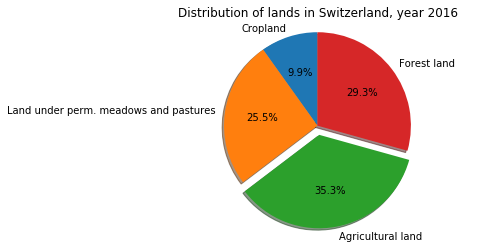

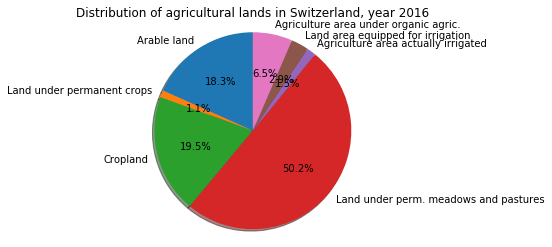

In [49]:
import matplotlib.pyplot as plt

# DataFrames to plot
df_land = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Land area']
df_agri = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Agricultural land']

# Pie plot #1
labels1 = df_land.Item
sizes1 = df_land.Value
explode = (0, 0, 0.1, 0)  # only "explode" the 3rd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode,labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Distribution of lands in Switzerland, year 2016')
fig1.set_facecolor('white')

# Pie plot #2
labels2 = df_agri.Item
sizes2 = df_agri.Value
fig1, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.title.set_text('Distribution of agricultural lands in Switzerland, year 2016')

# General settings
fig1.set_facecolor('white')
plt.show()

## Data loading - Demographical data 

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria but not Liechtenstein -data missing from dataset).
These data will allow us to know the number of consumers in Switzerland and to compare the possible food self-sufficiency between Switzerland and its neighbours. we would like to answer questions as: With the growing population, can we feed everybody with Swiss agriculture in the next few years?

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [50]:
demography = pd.read_csv('../data/FAOSTAT_data_demography.csv')

In [51]:
demography

Domain Code             Domain  Area Code         Area  Element Code  \
0            OA  Annual population         11      Austria           511   
1            OA  Annual population         11      Austria           511   
2            OA  Annual population         11      Austria           511   
3            OA  Annual population         11      Austria           511   
4            OA  Annual population         11      Austria           511   
..          ...                ...        ...          ...           ...   
409          OA  Annual population        211  Switzerland           511   
410          OA  Annual population        211  Switzerland           511   
411          OA  Annual population        211  Switzerland           511   
412          OA  Annual population        211  Switzerland           511   
413          OA  Annual population        211  Switzerland           511   

                           Element  Item Code                       Item  \
0    Total Population - Both sexes       3010  Population - Est. & Proj.   
1    Total Population - Both sexes       3010  Population - Est. & Proj.   
2    Total Population - Both sexes       3010  Population - Est. & Proj.   
3    Total Population - Both sexes       3010  Population - Est. & Proj.   
4    Total Population - Both sexes       3010  Population - Est. & Proj.   
..                             ...        ...                        ...   
409  Total Population - Both sexes       3010  Population - Est. & Proj.   
410  Total Population - Both sexes       3010  Population - Est. & Proj.   
411  Total Population - Both sexes       3010  Population - Est. & Proj.   
412  Total Population - Both sexes       3010  Population - Est. & Proj.   
413  Total Population - Both sexes       3010  Population - Est. & Proj.   

     Year Code  Year          Unit     Value Flag  \
0         1950  1950  1000 persons  6936.439    X   
1         1951  1951  1000 persons  6931.338    X   
2         1952  1952  1000 persons  6931.196    X   
3         1953  1953  1000 persons  6935.142    X   
4         1954  1954  1000 persons  6942.619    X   
..         ...   ...           ...       ...  ...   
409       2014  2014  1000 persons  8206.002    X   
410       2015  2015  1000 persons  8296.775    X   
411       2016  2016  1000 persons  8379.917    X   
412       2017  2017  1000 persons  8455.804    X   
413       2018  2018  1000 persons  8525.611    X   

                   Flag Description  \
0    International reliable sources   
1    International reliable sources   
2    International reliable sources   
3    International reliable sources   
4    International reliable sources   
..                              ...   
409  International reliable sources   
410  International reliable sources   
411  International reliable sources   
412  International reliable sources   
413  International reliable sources   

                                                  Note  
0    UNDESA, Population Division – World Population...  
1    UNDESA, Population Division – World Population...  
2    UNDESA, Population Division – World Population...  
3    UNDESA, Population Division – World Population...  
4    UNDESA, Population Division – World Population...  
..                                                 ...  
409                                                NaN  
410                                                NaN  
411                                                NaN  
412                                                NaN  
413                                                NaN  

[414 rows x 15 columns]

In [52]:
for col in demography:
    print (demography[col].unique())

['OA']
['Annual population']
[ 11  68  79 106 125 211]
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
[511]
['Total Population - Both sexes']
[3010]
['Population - Est. & Proj.']
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
['1000 persons']
[6.9364390e+03 6.9313380e+03 6.9311960e+03 6.9351420e+03 6.9426190e+03
 6.953406

In [53]:
demography = demography[['Area', 'Year', 'Value']]
demography

Area  Year     Value
0        Austria  1950  6936.439
1        Austria  1951  6931.338
2        Austria  1952  6931.196
3        Austria  1953  6935.142
4        Austria  1954  6942.619
..           ...   ...       ...
409  Switzerland  2014  8206.002
410  Switzerland  2015  8296.775
411  Switzerland  2016  8379.917
412  Switzerland  2017  8455.804
413  Switzerland  2018  8525.611

[414 rows x 3 columns]

The value unit beeing 1000 persons, we adjust the number to display the population values in terms of individuals

In [54]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
demography["Population"] = demography.Value.apply(lambda x: x*1000)
demography.drop(columns='Value')

Area  Year  Population
0        Austria  1950   6936439.0
1        Austria  1951   6931338.0
2        Austria  1952   6931196.0
3        Austria  1953   6935142.0
4        Austria  1954   6942619.0
..           ...   ...         ...
409  Switzerland  2014   8206002.0
410  Switzerland  2015   8296775.0
411  Switzerland  2016   8379917.0
412  Switzerland  2017   8455804.0
413  Switzerland  2018   8525611.0

[414 rows x 3 columns]

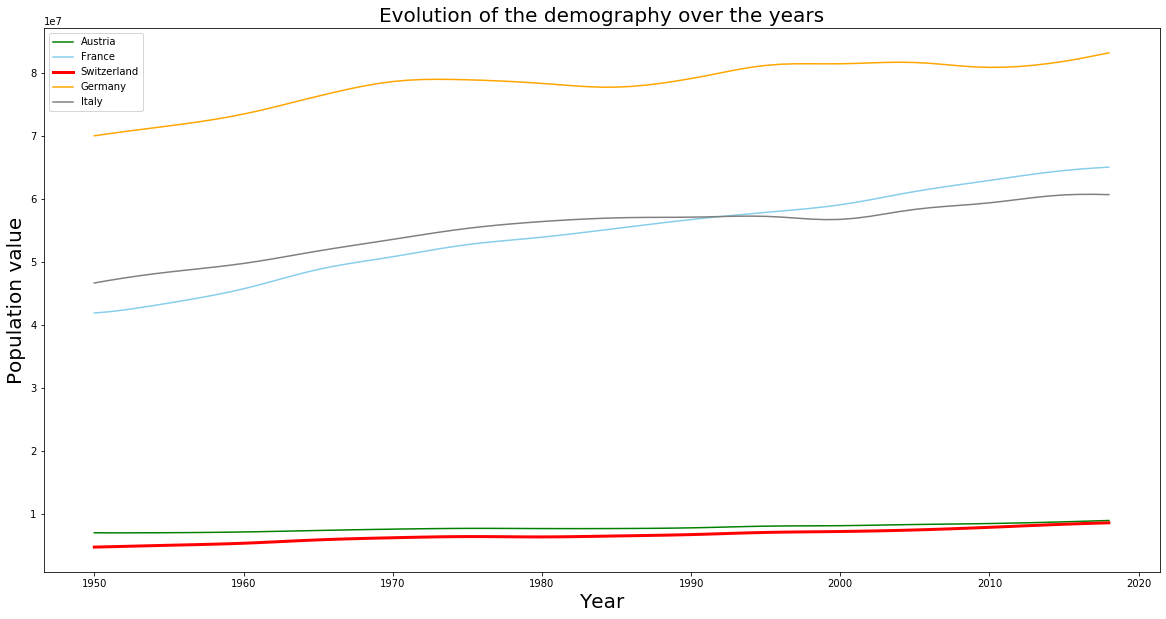

In [55]:
#plot of the evolution of the demography over the years
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Austria'], marker='', color='green',  label = 'Austria')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='France'], marker='', color='skyblue', label = 'France')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Germany'], marker='', color='orange', label = 'Germany')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
plt.legend() 
plt.title('Evolution of the demography over the years' , fontsize= 20)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Population value", fontsize= 20)
plt.show()

We can see that as expected, the population is growing in every country. 

## Data loading - Swiss importations and exportations of agricultural goods 

Files contain data for Switzerland only. The data provide insight about the trade of agricultural goods, that is the importations and exportations for a given product.
Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [56]:
CH_imports = pd.read_csv('../data/FAOSTAT_data_11-23-2019.csv')

In [57]:
CH_imports.head()

Domain Code                 Domain  Reporter Country Code  \
0          TM  Detailed trade matrix                    211   
1          TM  Detailed trade matrix                    211   
2          TM  Detailed trade matrix                    211   
3          TM  Detailed trade matrix                    211   
4          TM  Detailed trade matrix                    211   

  Reporter Countries  Partner Country Code Partner Countries  Element Code  \
0        Switzerland                     2       Afghanistan          5610   
1        Switzerland                     2       Afghanistan          5610   
2        Switzerland                     2       Afghanistan          5610   
3        Switzerland                     2       Afghanistan          5610   
4        Switzerland                     2       Afghanistan          5610   

           Element  Item Code                       Item  Year Code  Year  \
0  Import Quantity        231            Almonds shelled       2016  2016   
1  Import Quantity        527              Apricots, dry       2012  2012   
2  Import Quantity        633   Beverages, non alcoholic       2005  2005   
3  Import Quantity        689  Chillies and peppers, dry       2013  2013   
4  Import Quantity        767                Cotton lint       1995  1995   

     Unit  Value Flag Flag Description  
0  tonnes      0  NaN    Official data  
1  tonnes      0  NaN    Official data  
2  tonnes      0  NaN    Official data  
3  tonnes      0  NaN    Official data  
4  tonnes     23  NaN    Official data

In [58]:
CH_exports = pd.read_csv('../data/FAOSTAT_data_exports.csv')

In [59]:
CH_exports.head()

Domain Code                 Domain  Reporter Country Code  \
0          TM  Detailed trade matrix                    211   
1          TM  Detailed trade matrix                    211   
2          TM  Detailed trade matrix                    211   
3          TM  Detailed trade matrix                    211   
4          TM  Detailed trade matrix                    211   

  Reporter Countries  Partner Country Code Partner Countries  Element Code  \
0        Switzerland                     2       Afghanistan          5910   
1        Switzerland                     2       Afghanistan          5910   
2        Switzerland                     2       Afghanistan          5910   
3        Switzerland                     2       Afghanistan          5910   
4        Switzerland                     2       Afghanistan          5910   

           Element  Item Code                      Item  Year Code  Year  \
0  Export Quantity        633  Beverages, non alcoholic       2009  2009   
1  Export Quantity        633  Beverages, non alcoholic       2013  2013   
2  Export Quantity        633  Beverages, non alcoholic       2014  2014   
3  Export Quantity        633  Beverages, non alcoholic       2015  2015   
4  Export Quantity        901    Cheese, whole cow milk       2014  2014   

     Unit  Value Flag Flag Description  
0  tonnes     18  NaN    Official data  
1  tonnes     15  NaN    Official data  
2  tonnes     28  NaN    Official data  
3  tonnes     28  NaN    Official data  
4  tonnes      7  NaN    Official data

To make the data processing and analysis more simple and concise, we concatenate exportations and importations data (as both datasets have exactly the same structure).

In [60]:
CH_trade = pd.concat([CH_imports, CH_exports])

In [61]:
CH_trade.dtypes

Domain Code              object
Domain                   object
Reporter Country Code     int64
Reporter Countries       object
Partner Country Code      int64
Partner Countries        object
Element Code              int64
Element                  object
Item Code                 int64
Item                     object
Year Code                 int64
Year                      int64
Unit                     object
Value                     int64
Flag                     object
Flag Description         object
dtype: object

In [62]:
for col in CH_trade:
    print (CH_trade[col].unique())

['TM']
['Detailed trade matrix']
[211]
['Switzerland']
[  2   3   4   6   7 258   8   9   1  22  10  11  52  12  13  16  14  57
 255  15  23  53  17  18  19  80  20  21  24 239  26  27 233  29  35 115
  32  33  36  37  39  40  96 128  41 214  43  44  45  46  47  48 107  98
  49  50 167  51 116 250  54  72  55  56  58  59  60  61 178  63 209 238
  62  65  64  66  67  68  69  70  71  74  75  73  79  81  82  84  85  86
  87  88  89  90  91  93  94  95  97  99 100 101 102 103 104 105 106 109
 110 112 108 114  83 118 113 120 119 121 122 123 124 126 256 129 130 131
 132 133 134 127 135 136 137 138 145 141 273 142 143 144  28 147 148 149
 150 151 153 156 157 158 159 160 154 162 221 165 299 166 168 169 170 171
 172 173 174 177 179 117 146 182 183 185 184 187 188 189 190 191 244 192
 193 194 195 272 186 196 197 200 199 198  25 201 202 277 203  38 276 206
 207 210 212 208 216 176 217 219 220 222 223 213 224 227 226 230 225 229
 215 231 240 252 234 228 235 155 236 237 205 249 248 251 181   5  34 

For maximizing reliability of later results, we discard the numbers that were obtained from an unofficial source.

In [63]:
unofficial_stats_index = CH_trade.loc[CH_trade.Flag=='*'].index

In [64]:
# Drop the unofficial data
CH_trade = CH_trade.drop(index = unofficial_stats_index)

We keep only the importation and exportation values that are represented in tonnes, so that we can compare it with the agricultural production.

In [65]:
CH_trade = CH_trade.loc[CH_imports.Unit=='tonnes']

In [66]:
CH_trade = CH_trade[['Element','Partner Countries', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [67]:
CH_trade = CH_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [68]:
CH_trade_transformed = pd.pivot(CH_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [69]:
CH_trade_transformed

Element  Exported Quantity  Imported Quantity
0                      NaN             1743.0
1                      NaN              685.0
2                      NaN              575.0
3                      NaN             2246.0
4                      NaN             1374.0
...                    ...                ...
18341                  NaN            10497.0
18342               4664.0                NaN
18343                  NaN            10494.0
18344               4312.0                NaN
18345                  NaN            10104.0

[18346 rows x 2 columns]

In [70]:
CH_trade = pd.concat([CH_trade, CH_trade_transformed], axis=1, join='inner')

In [71]:
CH_trade.drop(columns=['Value', 'Element'], inplace=True)

In [72]:
CH_trade = CH_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()
                                    

Combine production and trade data in one dataframe 'CH_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [73]:
CH_crops = raw_CH_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

In [74]:
# Merge importations data with production data
CH_data = CH_crops.loc[CH_crops.Area=='Switzerland'].loc[CH_crops.Element=='Production'].loc[CH_crops.Year>= 1986]\
                                    .merge(CH_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})



In [75]:
CH_data

Area    Item     Element  Year    Unit  Produced Quantity  \
0     Switzerland  Apples  Production  1986  tonnes           393000.0   
1     Switzerland  Apples  Production  1987  tonnes           240200.0   
2     Switzerland  Apples  Production  1988  tonnes           492000.0   
3     Switzerland  Apples  Production  1989  tonnes           311000.0   
4     Switzerland  Apples  Production  1990  tonnes           397800.0   
...           ...     ...         ...   ...     ...                ...   
1399  Switzerland   Wheat  Production  2013  tonnes           479659.0   
1400  Switzerland   Wheat  Production  2014  tonnes           550826.0   
1401  Switzerland   Wheat  Production  2015  tonnes           527257.0   
1402  Switzerland   Wheat  Production  2016  tonnes           386720.0   
1403  Switzerland   Wheat  Production  2017  tonnes           530552.0   

      Exported Quantity  Imported Quantity  
0                2560.0             4607.0  
1                 145.0             5003.0  
2                  58.0             8975.0  
3                 253.0             1543.0  
4                 491.0             8468.0  
...                 ...                ...  
1399              167.0           436585.0  
1400              908.0           419904.0  
1401             1551.0           396564.0  
1402             6491.0           484790.0  
1403              323.0           527632.0  

[1404 rows x 8 columns]

Now, combine with the land analysis of Switzerland, the consumers trends and the Swiss demography we could estimate if the country has an interest of producing more of an item, if it is able to produce more of an item and stop its importation of the item. --> # Milestone 3

### Plot production, exports and imports of items in Switzerland over years.

This plot is interactive. It allows you to choose for an item (apples, berries..) and shows you its production, exportation and importation in Switzerland over years.

In [76]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = CH_data.loc[CH_data['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Produced Quantity', data=df_viz_evolution, marker='', color='red', label = 'crops', linewidth=3)
    plt.plot('Year', 'Imported Quantity', data=df_viz_evolution, marker='', color='blue', label = 'imports', linewidth=3)
    plt.plot('Year', 'Exported Quantity', data=df_viz_evolution, marker='', color='green', label = 'exports', linewidth=3) 
    plt.legend() 
    plt.title(f'Production and imports of {item} in Switzerland throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values [tonnes]", fontsize= 20)
    plt.show()
   
items = CH_data.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Artichokes', 'Asparagus', '…

<function __main__.viz_evolution(item)>

**Most produced, imported and exported products :**

- Most produced crops products

In [77]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area                 Item     Element  Year    Unit  \
1191  Switzerland           Sugar beet  Production  2016  tonnes   
1402  Switzerland                Wheat  Production  2016  tonnes   
982   Switzerland             Potatoes  Production  2016  tonnes   
30    Switzerland               Apples  Production  2016  tonnes   
119   Switzerland               Barley  Production  2016  tonnes   
641   Switzerland                Maize  Production  2016  tonnes   
493   Switzerland               Grapes  Production  2016  tonnes   
1033  Switzerland             Rapeseed  Production  2016  tonnes   
245   Switzerland  Carrots and turnips  Production  2016  tonnes   
594   Switzerland  Lettuce and chicory  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1191          1277407.0               13.0            42914.0  
1402           386720.0             6491.0           484790.0  
982            372900.0             5245.0           104191.0  
30             227300.0             4157.0            11063.0  
119            159890.0              437.0            34152.0  
641            144406.0              181.0           165867.0  
493            136352.0               96.0            34096.0  
1033            71900.0               31.0            11978.0  
245             68433.0                0.0             4203.0  
594             65946.0               69.0            37433.0

- Most imported crops products

In [78]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                   Item     Element  Year    Unit  \
1402  Switzerland                  Wheat  Production  2016  tonnes   
641   Switzerland                  Maize  Production  2016  tonnes   
982   Switzerland               Potatoes  Production  2016  tonnes   
729   Switzerland                   Oats  Production  2016  tonnes   
1191  Switzerland             Sugar beet  Production  2016  tonnes   
1280  Switzerland               Tomatoes  Production  2016  tonnes   
594   Switzerland    Lettuce and chicory  Production  2016  tonnes   
1338  Switzerland  Vegetables, fresh nes  Production  2016  tonnes   
119   Switzerland                 Barley  Production  2016  tonnes   
493   Switzerland                 Grapes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1402           386720.0             6491.0           484790.0  
641            144406.0              181.0           165867.0  
982            372900.0             5245.0           104191.0  
729              7106.0                8.0            50129.0  
1191          1277407.0               13.0            42914.0  
1280            41907.0               95.0            38360.0  
594             65946.0               69.0            37433.0  
1338            49909.0               92.0            34772.0  
119            159890.0              437.0            34152.0  
493            136352.0               96.0            34096.0

- Most exported crops products

In [79]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                     Item     Element  Year    Unit  \
1402  Switzerland                    Wheat  Production  2016  tonnes   
982   Switzerland                 Potatoes  Production  2016  tonnes   
30    Switzerland                   Apples  Production  2016  tonnes   
1248  Switzerland  Tobacco, unmanufactured  Production  2016  tonnes   
119   Switzerland                   Barley  Production  2016  tonnes   
746   Switzerland             Oilseeds nes  Production  2016  tonnes   
641   Switzerland                    Maize  Production  2016  tonnes   
1095  Switzerland                 Soybeans  Production  2016  tonnes   
609   Switzerland                  Linseed  Production  2016  tonnes   
1216  Switzerland           Sunflower seed  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1402           386720.0             6491.0           484790.0  
982            372900.0             5245.0           104191.0  
30             227300.0             4157.0            11063.0  
1248             1013.0             1391.0            17182.0  
119            159890.0              437.0            34152.0  
746                66.0              228.0             1908.0  
641            144406.0              181.0           165867.0  
1095             4500.0              161.0            12695.0  
609               286.0              130.0             6945.0  
1216            13000.0              125.0             5213.0

### Plot most produced, exported and  imported items in Switzerland, year 2016.

This plot is interactive. Shows values upon cursor selection.

In [80]:
import plotly # conda install -c anaconda plotly #AND# jupyter labextension install @jupyterlab/plotly-extension
import plotly.graph_objects as go
y_wheat = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Wheat'].values[0,-3:]
y_potatoes = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Potatoes'].values[0,-3:]
y_beet = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Sugar beet'].values[0,-3:]
y_maize = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Maize'].values[0,-3:]

x=['Produced', 'Exported', 'Imported']
fig = go.Figure(go.Bar(x=x, y=y_wheat, name='Wheat'))
fig.add_trace(go.Bar(x=x, y=y_potatoes, name='Potatoes'))
fig.add_trace(go.Bar(x=x, y=y_beet, name='Sugar beet'))
fig.add_trace(go.Bar(x=x, y=y_maize, name='Maize'))

fig.update_layout(
    title='Most produced, exported and imported items in Switzerland in 2016',
    yaxis_title="Values [tonnes]",
    barmode='stack', 
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f")
    )
fig.show()


We see that Switzerland is a very small exportator. 

### Plot production, importation and exportation of agricultural goods in Switzerland throughout years

This plot is interactive. Shows values upon cursor selection

In [81]:
import plotly.graph_objects as go

def viz_potatoe(item):
    y_wheat = CH_data.loc[CH_data.Item==item].values[:,-3:]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,0], fill='tonexty', name='Produced')) # fill down to xaxis
    fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,1], fill='tozeroy', name='Exported')) # fill to trace0 y
    fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,2], fill='tonexty', name='Imported')) # fill to trace0 y
    fig.update_layout(
        title=f"{item} importations and productions throughout years in Switzerland",
        yaxis_title="Values [tonnes]",
        xaxis_title='Years'
        )
    fig.show()

items = CH_data.Item.unique()
interact(viz_potatoe, item = items)  


interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Artichokes', 'Asparagus', '…

<function __main__.viz_potatoe(item)>

### Plot production,  importation and exportation in Switzerland throughout years

This plot is interactive. Shows values upon cursor selection. As reported before, values of exportations are much lower than those of production and importations. Hence, exportations values will now be plot separately, to better show their trend.

In [82]:
total_crops_imports = CH_data.groupby('Year').agg({'Produced Quantity':'sum', 'Exported Quantity':'sum', 'Imported Quantity':'sum'})

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Produced Quantity'].values, fill='tonexty', name='Produced')) # fill down to xaxis
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Imported Quantity'].values, fill='tozeroy', name='Imported')) # fill to trace0 y
fig.update_layout(
    title="Sum of all importations and productions throughout years in Switzerland",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Exported Quantity'].values, fill='tozeroy', name='Exported')) # fill to trace0 y
fig.update_layout(
    title="Sum of exportations throughout years in Switzerland",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()

Maybe we could add here an intercative plot where we can select the item to see (but for now we are sure if we can/how to combine plotly and ipwidgets libraries)

In [85]:
CH_data2 = CH_data.copy().rename(columns={'Produced Quantity':'Country production', 'Imported Quantity':'Importation', 'Exported Quantity':'Exportation'})
CH_data_transformed = pd.melt(CH_data2, value_vars=['Country production', 'Importation'], id_vars=['Area', 'Element','Item','Year','Unit'], var_name='Input', value_name='Value')

In [86]:
CH_data_transformed.loc[CH_data_transformed.Item=='Potatoes']

Area     Element      Item  Year    Unit               Input  \
952   Switzerland  Production  Potatoes  1986  tonnes  Country production   
953   Switzerland  Production  Potatoes  1987  tonnes  Country production   
954   Switzerland  Production  Potatoes  1988  tonnes  Country production   
955   Switzerland  Production  Potatoes  1989  tonnes  Country production   
956   Switzerland  Production  Potatoes  1990  tonnes  Country production   
...           ...         ...       ...   ...     ...                 ...   
2383  Switzerland  Production  Potatoes  2013  tonnes         Importation   
2384  Switzerland  Production  Potatoes  2014  tonnes         Importation   
2385  Switzerland  Production  Potatoes  2015  tonnes         Importation   
2386  Switzerland  Production  Potatoes  2016  tonnes         Importation   
2387  Switzerland  Production  Potatoes  2017  tonnes         Importation   

         Value  
952   742900.0  
953   657700.0  
954   836400.0  
955   770000.0  
956   712400.0  
...        ...  
2383   48530.0  
2384   40161.0  
2385   37785.0  
2386  104191.0  
2387   57721.0  

[64 rows x 7 columns]

### Plot evolution of production and importations for five most important items (Switzerland data only)

This plot is interactive. Shows values upon cursor selection

In [87]:
CH_restrained = CH_data_transformed.loc[CH_data_transformed.Item.isin(['Apples','Wheat','Potatoes', 'Maize', 'Oats'])]



In [88]:
# Just trying a plot
import plotly.express as px
fig = px.area(CH_restrained, x="Year", y="Value", color='Item',
      line_group='Input')
fig.update_layout(
    title="Switzerland's production/importation evolution for five most important items",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()

In [89]:
CH_data_transformed_exportations = pd.melt(CH_data2, value_vars='Exportation', id_vars=['Area', 'Element','Item','Year','Unit'], var_name='Input', value_name='Value')


In [90]:
CH_restrained_exportations = CH_data_transformed_exportations.loc[CH_data_transformed_exportations.Item.isin(['Apples','Wheat','Potatoes', 'Maize', 'Oats'])]

In [91]:
import plotly.express as px
fig = px.area(CH_restrained_exportations, x="Year", y="Value", color='Item',
      line_group='Input')
fig.update_layout(
    title="Switzerland's exportations evolution for five most important items over time",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()

## Data Loading -  Switzerland temperatures

This dataset does not come from FAOSTATS but from : __[MeteoSwiss](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html)__

In [92]:
CH_temperatures = pd.read_csv('../data/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt', sep="\t", header=0, skiprows=15)

In [93]:
CH_temperatures = CH_temperatures.loc[CH_temperatures.time>=1986].loc[CH_temperatures.time<=2017]

In [94]:
CH_temperatures = CH_temperatures.iloc[:,-3:]

In [95]:
CH_temperatures

winter  summer  year
122   -1.03    9.84  4.61
123   -0.65    9.78  4.69
124    0.77   10.28  5.35
125    1.63    9.93  5.85
126    1.84   10.12  5.70
127    0.16   10.03  4.98
128    0.08   10.90  5.72
129    0.50   10.29  5.18
130    0.70   10.77  6.38
131    1.12    9.82  5.20
132    0.18    9.60  4.62
133    0.96   10.37  5.85
134    1.17   10.58  5.46
135   -0.42   10.86  5.37
136    0.17   10.98  5.99
137    1.37    9.97  5.46
138    1.25   10.37  6.08
139    0.52   12.60  6.24
140    0.09   10.38  5.40
141   -0.25   10.75  4.99
142   -0.82   11.22  5.95
143    2.61   11.10  6.07
144    0.61   10.40  5.62
145   -0.47   11.82  5.81
146   -0.34   10.43  4.69
147    0.27   11.74  6.62
148    0.85   11.16  5.81
149   -0.24   10.66  5.27
150    1.63   10.60  6.51
151    1.65   11.76  6.67
152    1.87   11.14  6.07
153    1.09   11.43  6.18

### Plot : Is there a correlation between production and temperature?


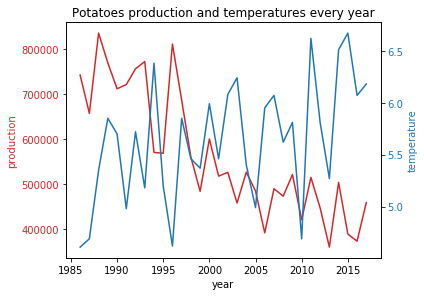

In [96]:
years = np.sort(CH_data.Year.unique())
fig, ax1 = plt.subplots()
data1 = CH_data.loc[CH_data.Item=='Potatoes']['Produced Quantity']
data2 = CH_temperatures.year

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('production', color=color)
ax1.plot(years, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(years, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Potatoes production and temperatures every year')
plt.show()

## Plan - What's coming next?

<div class="alert alert-block alert-info">
    
1. Defining what is food self-sufficiency
    1. $ SSR = Production * 100 / (Production + Imports - Exports)$ to develop
    2. Addapt it to the Swiss case : take a look to what we import (basic needs ?), export (top exports ? by far ?) and production graphs
    3. __[Ref. Paper "Food self-sufficiency: Making sense of it, and when it makes sense" By Jennifer Clapp](https://www.sciencedirect.com/science/article/pii/S0306919216305851#b0240)__. <br> Résumé : __[Résumé par le site Resilience du paper de Clapp](https://www.resilience.org/stories/2018-03-13/food-self-sufficiency-does-it-make-sense/)__
    4. Compare our results with other sources just to know if we share the same results (e.g. selfsufficiency switzerland on wikipedia __[List of countries by food self-sufficieent rate](https://en.wikipedia.org/wiki/List_of_countries_by_food_self-sufficiency_rate)__)

    
2. Food situation of Switzerland from 1986 to 2017.
    1. Is/was it food self-sufficient ? SSR scores over the years.
    2. Comapre to neighbours

    
3. Will it be **physically** possible for Switzerland in a near future to be food self-sufficient (in the sense of the 2018 initiative bc we have seen that definition is relative) taking into account its population growth (hesimated increase in consumption computation)? What would it imply/take into account in terms of :
    1. Area harvested (actual ratio and estimation of its evolution)
    2. Farmers population 
    3. Temperature (climate impact food production correlation)
    4. Environment (use of fertilizers needed ? depends on productivity)

    
4. Attempt on **economy** consequences analysis ?
    1. Complicated ... What about looking at what happended in countries that adopted food self-sufficient policies such as Senegal, India, the Philippines, Qatar, Bolivia, and Russia ? (Jaccard and correlations?)
    2. Jaccard similarity of country based on SSR to see which country should adopt more food self-sufficient policies ?

In [99]:
CH_data.loc[CH_data.Item=='Sugar beet'].loc[CH_data.Year==2013]

Area        Item     Element  Year    Unit  Produced Quantity  \
1188  Switzerland  Sugar beet  Production  2013  tonnes          1376289.0   

      Exported Quantity  Imported Quantity  
1188                0.0            14898.0

In [100]:
CH_data

Area    Item     Element  Year    Unit  Produced Quantity  \
0     Switzerland  Apples  Production  1986  tonnes           393000.0   
1     Switzerland  Apples  Production  1987  tonnes           240200.0   
2     Switzerland  Apples  Production  1988  tonnes           492000.0   
3     Switzerland  Apples  Production  1989  tonnes           311000.0   
4     Switzerland  Apples  Production  1990  tonnes           397800.0   
...           ...     ...         ...   ...     ...                ...   
1399  Switzerland   Wheat  Production  2013  tonnes           479659.0   
1400  Switzerland   Wheat  Production  2014  tonnes           550826.0   
1401  Switzerland   Wheat  Production  2015  tonnes           527257.0   
1402  Switzerland   Wheat  Production  2016  tonnes           386720.0   
1403  Switzerland   Wheat  Production  2017  tonnes           530552.0   

      Exported Quantity  Imported Quantity  
0                2560.0             4607.0  
1                 145.0             5003.0  
2                  58.0             8975.0  
3                 253.0             1543.0  
4                 491.0             8468.0  
...                 ...                ...  
1399              167.0           436585.0  
1400              908.0           419904.0  
1401             1551.0           396564.0  
1402             6491.0           484790.0  
1403              323.0           527632.0  

[1404 rows x 8 columns]